In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy import interpolate
from IPython.display import clear_output

In [17]:
Nx = 2**6
Nt = 2**17
dx = 1/Nx
dz = 4*dx
dt = 1/Nt
xx = np.arange(0,1+dx,dx)
zz = np.arange(0,1+dz,dz)
tt = np.arange(0,1+dt,dt)
nu = 0.1

mean = 0
std_dev = 1
u0_ = np.random.normal(mean, std_dev, zz.shape[0])
spl = interpolate.splrep(zz,u0_)
u0 = interpolate.splev(xx,spl)


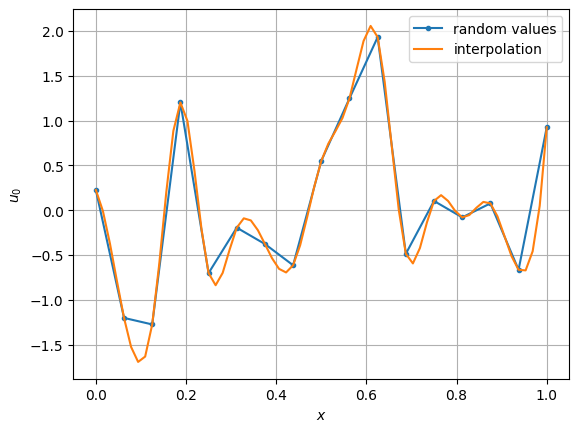

In [18]:
plt.figure()
plt.plot(zz,u0_, label='random values', marker='.')
plt.plot(xx,u0, label='interpolation')
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$u_0$')
plt.legend()


In [19]:
uh = np.zeros((xx.shape[0],tt.shape[0]))
uh[:,0] = u0

In [20]:
for j in range(0, tt.shape[0]-1):
    for i in range(1, xx.shape[0]-1):
        uh[i,j+1] = uh[i,j] + nu*dt*(uh[i+1,j] - 2*uh[i,j] + uh[i-1,j])/(dx**2) - 0.5*dt*(uh[i,j]**2-uh[i-1,j]**2)/dx

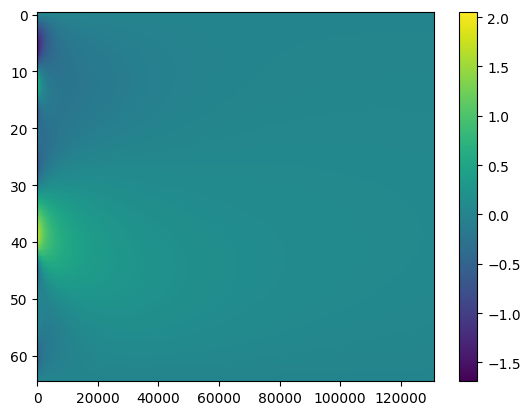

In [21]:
plt.figure()
plt.imshow(uh,aspect='auto')
plt.colorbar()

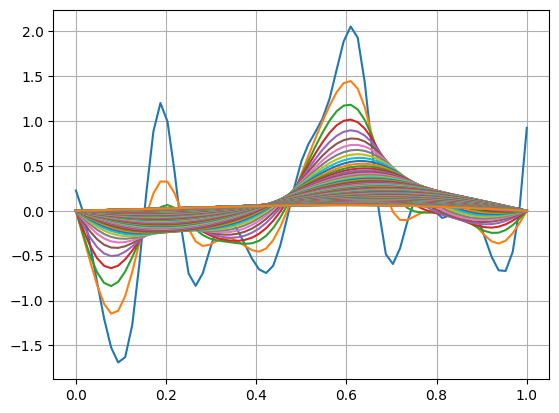

In [22]:
plt.figure()
plt.grid(True)
for j,t in enumerate(tt):
    if np.mod(j,1000)==0:
        plt.plot(xx, uh[:,j])

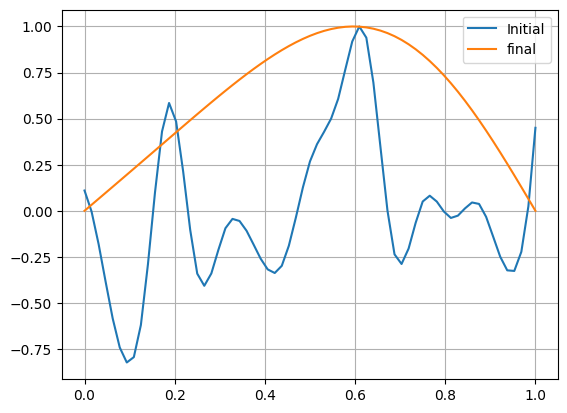

In [23]:
plt.figure()
plt.plot(xx,u0/u0.max(), label='Initial')
plt.plot(xx,uh[:,-1]/np.abs(uh[:,-1]).max(), label='final')
plt.grid(True)
plt.legend()

Dataset for the non-linear Burgers equation

In [ ]:
# Training set
N_samples = 640
Nx = 2**6
Nt = 2**17
dx = 1/Nx
dz = 5*dx
dt = 1/Nt
xx = np.arange(0,1+dx,dx)
zz = np.arange(0,1+dz,dz)
tt = np.arange(0,1+dt,dt)
nu = 0.1

mean = 0
std_dev = 1
input_list = []
output_list =[]

for n in range(N_samples):
    clear_output(wait=True)
    print('Advancing: '+str(n/N_samples*100) +'%')
    u0_ = np.random.normal(mean, std_dev, zz.shape[0])
    u0_[0] = 0
    u0_[-1] = u0_[0]
    spl = interpolate.splrep(zz,u0_)
    u0 = interpolate.splev(xx,spl)
    uh = np.zeros((xx.shape[0],tt.shape[0]))
    uh[:,0] = u0
    for j in range(0, tt.shape[0]-1):
        for i in range(1, xx.shape[0]-1):
            uh[i,j+1] = uh[i,j] + nu*dt*(uh[i+1,j] - 2*uh[i,j] + uh[i-1,j])/(dx**2) - 0.5*dt*(uh[i,j]**2-uh[i-1,j]**2)/dx
    input_list.append(u0)
    output_list.append(uh[:,-1])

input_train = np.array(input_list)
output_train = np.array(output_list)

In [ ]:
save_flag = False
# save_flag = True
if save_flag:
    np.save('../data/Burgers/input_train.npy', input_train)
    np.save('../data/Burgers/output_train.npy', output_train)
    print('train dataset saved')

In [ ]:
# Test set
N_samples = 160
Nx = 2**6
Nt = 2**17
dx = 1/Nx
dz = 5*dx
dt = 1/Nt
xx = np.arange(0,1+dx,dx)
zz = np.arange(0,1+dz,dz)
tt = np.arange(0,1+dt,dt)
nu = 0.1
mean = 0
std_dev = 1
input_list = []
output_list =[]

for n in range(N_samples):
    clear_output(wait=True)
    print('Advancing: '+str(n/N_samples*100) +'%')
    u0_ = np.random.normal(mean, std_dev, zz.shape[0])
    u0_[0] = 0
    u0_[-1] = u0_[0]
    spl = interpolate.splrep(zz,u0_)
    u0 = interpolate.splev(xx,spl)
    uh = np.zeros((xx.shape[0],tt.shape[0]))
    uh[:,0] = u0
    for j in range(0, tt.shape[0]-1):
        for i in range(1, xx.shape[0]-1):
            uh[i,j+1] = uh[i,j-1] + nu*dt*(uh[i+1,j-1] - 2*uh[i,j-1] + uh[i-1,j-1])/(dx**2) - dt*(uh[i,j]**2-uh[i-1,j]**2)/dx
    input_list.append(u0)
    output_list.append(uh[:,-1])

input_test = np.array(input_list)
output_test = np.array(output_list)

Advancing: 98.75%


In [ ]:
save_flag = False
# save_flag = True
if save_flag:
    np.save('../data/Burgers/input_test.npy', input_test)
    np.save('../data/Burgers/output_test.npy', output_test)
    print('test dataset saved')

test dataset saved


In [ ]:
# input_train=np.load('../data/Burgers/input_train.npy')
# output_train=np.load('../data/Burgers/output_train.npy')
# input_train_1=np.load('../data/Burgers/input_train_1.npy')
# output_train_1=np.load('../data/Burgers/output_train_1.npy')
# input_train_2=np.load('../data/Burgers/input_train_2.npy')
# output_train_2=np.load('../data/Burgers/output_train_2.npy')
# input_train_3=np.load('../data/Burgers/input_train_3.npy')
# output_train_3=np.load('../data/Burgers/output_train_3.npy')

# input_train = np.concatenate((input_train, input_train_1, input_train_2, input_train_3))
# output_train = np.concatenate((output_train, output_train_1, output_train_2, output_train_3))